In [41]:
# temperature heatmap
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import numpy as np

import os
import seaborn as sns
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

SST_DATA_PATH = '/l/users/minghao.fu/dataset/WeatherBench_data_full/temperature_850/*.nc'

z500 = xr.open_mfdataset(SST_DATA_PATH, combine='by_coords')

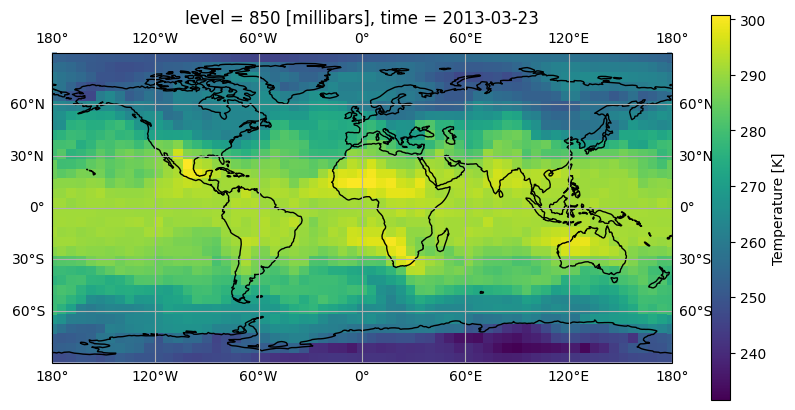

In [42]:

data = z500.t.isel(time=300000)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([-100, 20, 0, 70])

# Plot the data
ax.gridlines(draw_labels=True)
data.plot(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat')

In [43]:
data = z500.t.sel(lon=146.25,lat=-30.9375)

In [44]:
# Assuming 'data' is your xarray DataArray
temperature_values_in_kelvin = data.values

# Convert to degrees Celsius
temperature_values_in_celsius = temperature_values_in_kelvin - 273.15

print(temperature_values_in_celsius)

[18.37738  18.208435 19.16742  ... 21.907257 21.88028  21.988312]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


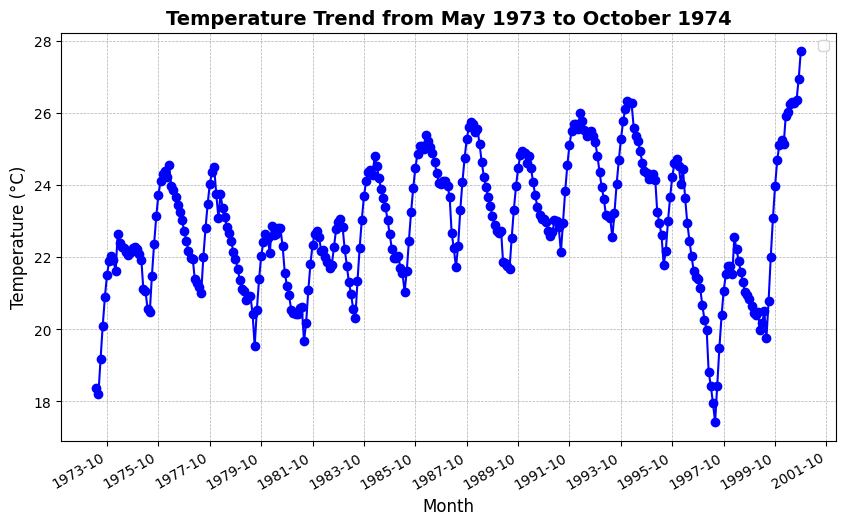

In [49]:
import numpy as np

months = np.arange('1973-05', '2000-11', dtype='datetime64[M]')
temperature = temperature_values_in_celsius[:len(months)]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(months, temperature, marker='o', linestyle='-', color='b')

ax.set_title('Temperature Trend from May 1973 to October 1974', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True, linestyle='--', linewidth=0.5)

ax.legend(loc='upper right')

# Format the x-axis for better readability
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.autofmt_xdate()

# Save the figure
plt.savefig('temperature_trend.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

The dominant period is: 23.57142857142857


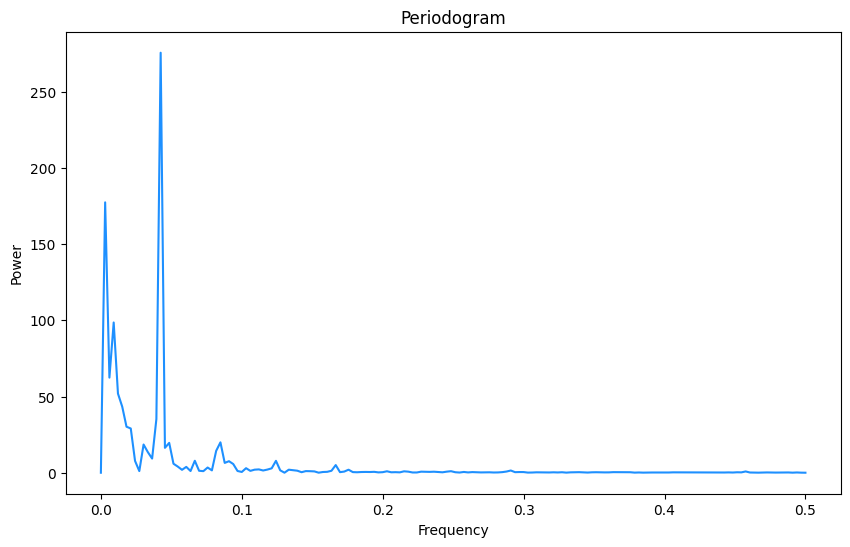

In [50]:
import pandas as pd
import numpy as np
from scipy.signal import periodogram
import matplotlib.pyplot as plt

# Assuming 'data' is a list of values
data_frame = pd.DataFrame(temperature, columns=['Value'])

# Calculate the periodogram
frequencies, power = periodogram(data_frame['Value'])

# Find the frequency with the highest power
dominant_frequency = frequencies[np.argmax(power)]

# The dominant period is the inverse of the dominant frequency
dominant_period = 1 / dominant_frequency

print(f"The dominant period is: {dominant_period}")

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power, color='dodgerblue')
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

The periods are: [330.         110.          33.          23.57142857  20.625
  16.5         15.          13.2         11.78571429  11.
   9.70588235   8.91891892   8.04878049   7.5          6.875
   6.           5.68965517   5.32258065   5.15625      4.92537313
   4.7826087    4.64788732   4.4          4.23076923   4.02439024
   3.88235294   3.79310345   3.62637363   3.4375       3.36734694
   3.23529412   3.11320755   3.05555556   2.94642857   2.84482759
   2.75         2.70491803   2.66129032   2.61904762   2.55813953
   2.46268657   2.39130435   2.30769231   2.24489796   2.2147651
   2.18543046   2.11538462   2.04968944   2.02453988]


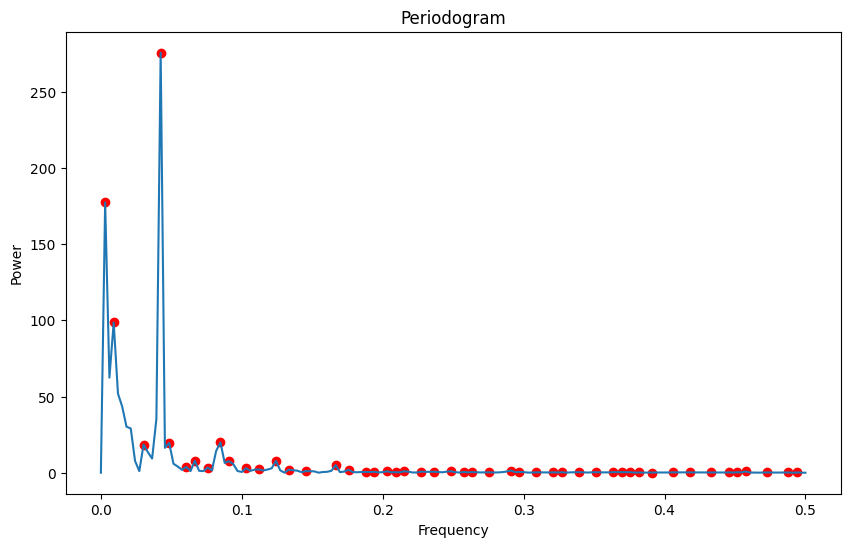

In [51]:
import pandas as pd
import numpy as np
from scipy.signal import periodogram, argrelextrema
import matplotlib.pyplot as plt

# Assuming 'data' is a list of values
data_frame = pd.DataFrame(temperature, columns=['Value'])

# Calculate the periodogram
frequencies, power = periodogram(data_frame['Value'])

# Find the local maxima in the power spectrum
local_maxima = argrelextrema(power, np.greater)

# The periods corresponding to the local maxima are the inverses of the frequencies
periods = 1 / frequencies[local_maxima]

print(f"The periods are: {periods}")

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power)
plt.scatter(frequencies[local_maxima], power[local_maxima], color='red')  # highlight the local maxima
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

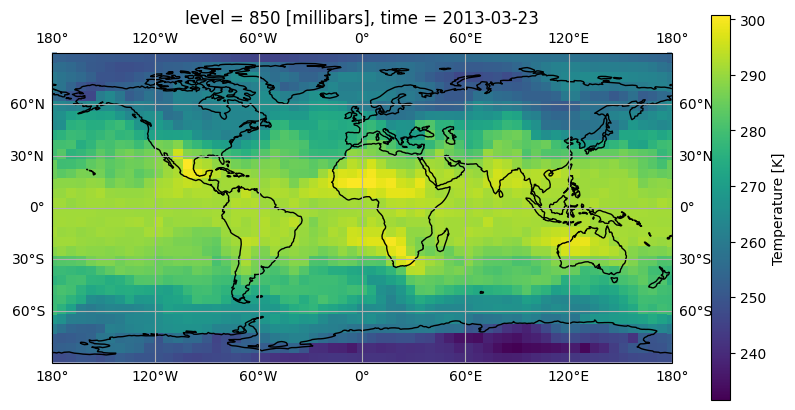

In [1]:
# temperature heatmap
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

z500 = xr.open_mfdataset('/l/users/minghao.fu/dataset/WeatherBench_data_full/temperature_850/*.nc', combine='by_coords')
data = z500.t.isel(time=300000)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([-100, 20, 0, 70])

# Plot the data
ax.gridlines(draw_labels=True)
data.plot(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat')